# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

1) Delivery_time -> Predict delivery time using sorting time

In [200]:
import warnings
warnings.filterwarnings('ignore')

In [201]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [202]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [203]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [204]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 96A6-C6DC

 Directory of C:\Users\Swetha\Desktop\EXCELR\DS - ASSIGNMENT\SIMPLE LINEAR REGRESSION

31-03-2022  11:56    <DIR>          .
31-03-2022  11:56    <DIR>          ..
31-03-2022  10:50    <DIR>          .ipynb_checkpoints
30-03-2022  15:41               218 delivery_time.csv
30-03-2022  15:39               318 Problem_statements.txt
30-03-2022  15:40               454 Salary_Data.csv
30-03-2022  22:18           276,827 SIMPLE LINEAR REGRESSION MODEL.ipynb
31-03-2022  11:56            28,321 UPDATED SIMPLE LINEAR REGRESSION MODEL .ipynb
               5 File(s)        306,138 bytes
               3 Dir(s)  135,539,040,256 bytes free


In [205]:
dt = pd.read_csv("delivery_time.csv")
dt

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [206]:
dt = pd.read_csv("delivery_time.csv")
print (dt.shape,"Shape of Data Frame")
print ("="*30)
print (dt.head(10))

(21, 2) Shape of Data Frame
   Delivery Time  Sorting Time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


In [207]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [208]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

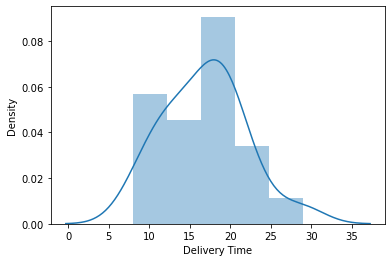

In [209]:
sns.distplot(dt['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

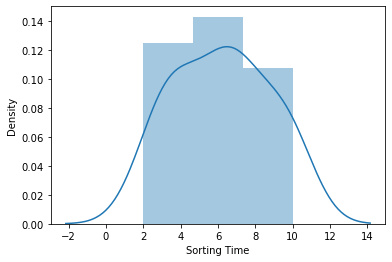

In [210]:
sns.distplot(dt['Sorting Time'])

In [211]:
dt.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [212]:
dt.shape

(21, 2)

In [213]:
# Renaming Columns
dt=dt.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


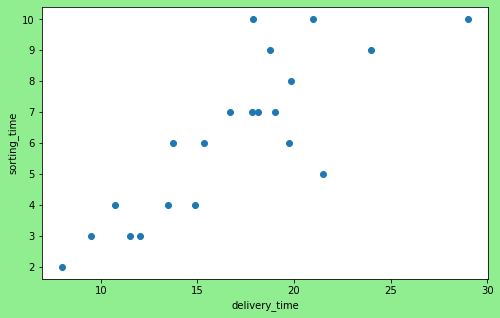

In [214]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,dt.sorting_time,);
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
# print (dt.sorting_time)
plt.show()

In [215]:
# creating model with SKLEARN

In [216]:
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [217]:
lm = LinearRegression()

X = dt["delivery_time"].values.reshape(-1,1)
Y = dt["sorting_time"].values.reshape(-1,1)

reg_sklearn = lm.fit(X,Y)

In [218]:
dt["delivery_time"]

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

In [219]:
X

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

In [220]:
print (reg_sklearn.coef_)#alpha 
print (reg_sklearn.intercept_)#beta

[[0.41374363]]
[-0.75667337]


In [221]:
reg_sklearn.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

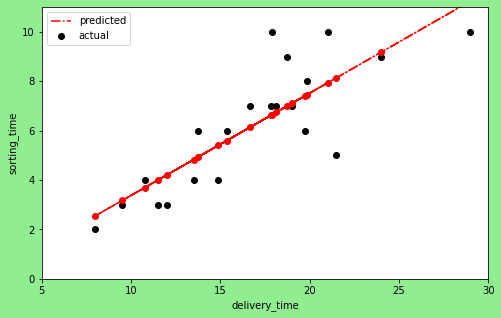

In [222]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,(dt.sorting_time),color="black",label="actual");
plt.plot(dt.delivery_time,reg_sklearn.predict(X),label="predicted",color="red",linestyle="-.");
plt.scatter(dt.delivery_time,reg_sklearn.predict(X),color="red")
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
plt.xlim(5,30)
plt.ylim(0,11)
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

In [223]:
# Model Validation

In [224]:
pred_train_lm =reg_sklearn.predict(X)
r2_score(dt["sorting_time"],pred_train_lm)


0.682271474841723

In [225]:
# model with statsmodels

In [226]:
dt

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [227]:
first_model = smf.ols("sorting_time~delivery_time",data=dt).fit()
# pred_statsmodel = first_model.predict(wcat["Waist"])
# r2_score(wcat["AT"],pred_train_lm)

In [228]:
first_model.params

Intercept       -0.756673
delivery_time    0.413744
dtype: float64

In [229]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        11:56:51   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7567      1.134     -0.667      0.513      -3.130       1.617
delivery_time     0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

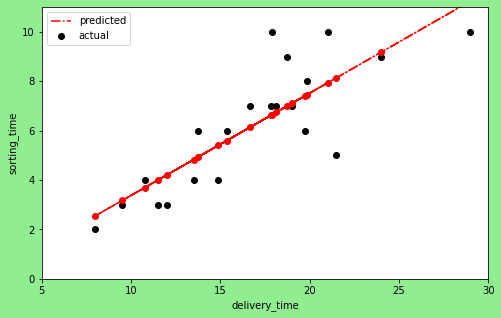

In [230]:
plt.figure(figsize=(8,5),facecolor="lightgreen")
plt.scatter(dt.delivery_time,(dt.sorting_time),color="black",label="actual");
plt.plot(dt.delivery_time,first_model.predict(dt["delivery_time"]),label="predicted",color="red",linestyle="-.");
plt.scatter(dt.delivery_time,first_model.predict(dt["delivery_time"]),color="red")
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
plt.xlim(5,30)
plt.ylim(0,11)
# print (sorting_time)
plt.legend(loc="best")
plt.show()

In [231]:
model2 = smf.ols('sorting_time~np.log(delivery_time)',data=dt).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sorting_time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                        11:56:51   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(delivery_time)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [232]:
model3 = smf.ols('np.log(sorting_time)~delivery_time',data=dt).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.695
Model:                              OLS   Adj. R-squared:                  0.679
Method:                   Least Squares   F-statistic:                     43.39
Date:                  Thu, 31 Mar 2022   Prob (F-statistic):           2.64e-06
Time:                          11:56:52   Log-Likelihood:               -0.85600
No. Observations:                    21   AIC:                             5.712
Df Residuals:                        19   BIC:                             7.801
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.4372      0.204      2.139      0.046       0.009       0.865
delivery_time     0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [233]:
dt["delivery_time_Sq"] = dt.delivery_time**2
model_quad = smf.ols("np.log(sorting_time)~delivery_time+delivery_time_Sq",data=dt).fit()
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(sorting_time)   R-squared:                       0.794
Model:                              OLS   Adj. R-squared:                  0.771
Method:                   Least Squares   F-statistic:                     34.62
Date:                  Thu, 31 Mar 2022   Prob (F-statistic):           6.77e-07
Time:                          11:56:52   Log-Likelihood:                 3.2337
No. Observations:                    21   AIC:                           -0.4673
Df Residuals:                        18   BIC:                             2.666
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.7780      0.450     -1.730      0.101      -1.723       0.167
delivery_time        0.2272      0.052      4.346      0.000       0.117       0.337
delivery_time_Sq    -0.0043      0.001     -2.928      0.009      -0.007      -0.001
==============================================================================
Omnibus:                        1.853   Durbin-Watson:                   1.280
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                0.957
Skew:                          -0.521   Prob(JB):                        0.620
Kurtosis:                       3.100   Cond. No.                     3.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
dt

,delivery_time,sorting_time,delivery_time_Sq
0,21.00,10,441.0000
1,13.50,4,182.2500
2,19.75,6,390.0625
3,24.00,9,576.0000
4,29.00,10,841.0000
5,15.35,6,235.6225
6,19.00,7,361.0000
7,9.50,3,90.2500
8,17.90,10,320.4100
9,18.75,9,351.5625


In [235]:
np.exp(model_quad.predict(dt[["delivery_time","delivery_time_Sq"]]))

0     8.250905
1     4.531944
2     7.720077
3     9.165723
4     9.206382
5     5.493602
6     7.370749
7     2.705128
8     6.827202
9     7.250110
10    7.756102
11    3.225473
12    6.195767
13    3.561679
14    3.809137
15    5.245998
16    4.659292
17    6.933311
18    2.152041
19    6.791625
20    8.441717
dtype: float64

# Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

2) Salary_hike -> Build a prediction model for Salary_hike

In [236]:
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score
import seaborn as sns

In [237]:
# import dataset
dataset=pd.read_csv("C:\\Users\\Swetha\\Desktop\\EXCELR\\DS - ASSIGNMENT\\SIMPLE LINEAR REGRESSION\\Salary_Data.csv")
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [238]:
print (dataset.shape,"Shape of Data Frame")
print ("="*30)

print (dataset.head(10))

(30, 2) Shape of Data Frame
   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
5              2.9  56642.0
6              3.0  60150.0
7              3.2  54445.0
8              3.2  64445.0
9              3.7  57189.0


In [239]:
# EDA and data Visualization

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [240]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

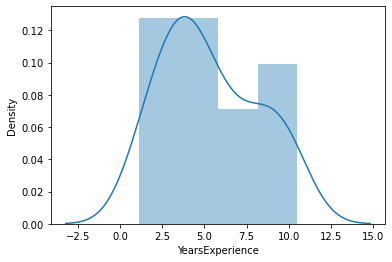

In [241]:
sns.distplot(dataset['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

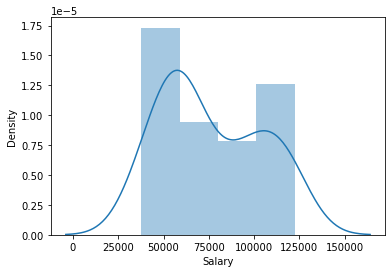

In [242]:
sns.distplot(dataset['Salary'])

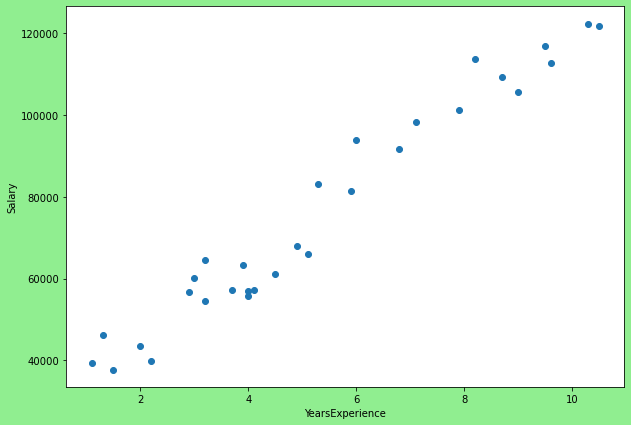

In [243]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.YearsExperience,dataset.Salary,);
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
# print (dataset.Salary)
plt.show()

In [244]:
# Correlation analysis

dataset.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [245]:
dataset.shape

(30, 2)

In [246]:
# creating model with SKLEARN

dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [247]:
lm = LinearRegression()

X = dataset["YearsExperience"].values.reshape(-1,1)
Y = dataset["Salary"].values.reshape(-1,1)

reg_sklearn = lm.fit(X,Y)

In [248]:
dataset["YearsExperience"]

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [249]:
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [250]:
print (reg_sklearn.coef_)#alpha 
print (reg_sklearn.intercept_)#beta

[[9449.96232146]]
[25792.20019867]


In [251]:
reg_sklearn.predict(X)

array([[ 36187.15875227],
       [ 38077.15121656],
       [ 39967.14368085],
       [ 44692.12484158],
       [ 46582.11730587],
       [ 53197.09093089],
       [ 54142.08716303],
       [ 56032.07962732],
       [ 56032.07962732],
       [ 60757.06078805],
       [ 62647.05325234],
       [ 63592.04948449],
       [ 63592.04948449],
       [ 64537.04571663],
       [ 68317.03064522],
       [ 72097.0155738 ],
       [ 73987.00803809],
       [ 75877.00050238],
       [ 81546.97789525],
       [ 82491.9741274 ],
       [ 90051.94398456],
       [ 92886.932681  ],
       [100446.90253816],
       [103281.8912346 ],
       [108006.87239533],
       [110841.86109176],
       [115566.84225249],
       [116511.83848464],
       [123126.81210966],
       [125016.80457395]])

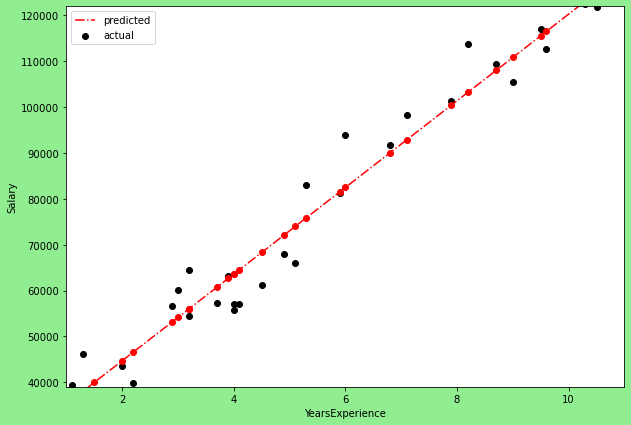

In [252]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.YearsExperience,(dataset.Salary),color="black",label="actual");
plt.plot(dataset.YearsExperience,reg_sklearn.predict(X),label="predicted",color="red",linestyle="-.");
plt.scatter(dataset.YearsExperience,reg_sklearn.predict(X),color="red")
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.xlim(1,11)
plt.ylim(39000,+122000)
# print (dataset.Salary)
plt.legend(loc="best")
plt.show()

In [253]:
# Model Validation

pred_train_lm =reg_sklearn.predict(X)
r2_score(dataset["Salary"],pred_train_lm)

0.9569566641435086

In [254]:
# Model with stats model

dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [255]:
first_model = smf.ols("Salary~YearsExperience",data=dataset).fit()
# pred_statsmodel = first_model.predict(dataset["YearsExperience"])
# r2_score(dataset["Salary"],pred_train_lm)

In [256]:
first_model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [257]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           1.14e-20
Time:                        11:57:33   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

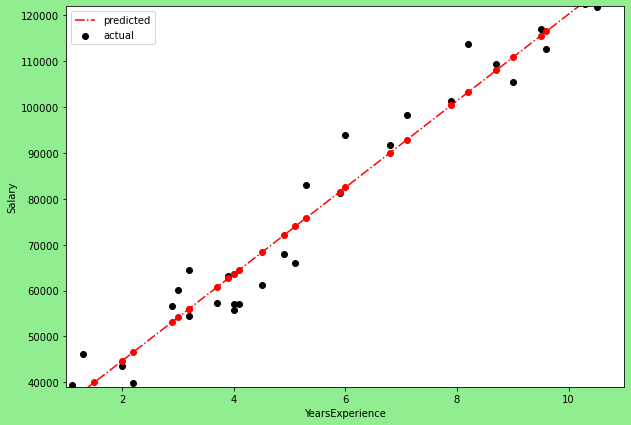

In [258]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(dataset.YearsExperience,(dataset.Salary),color="black",label="actual");
plt.plot(dataset.YearsExperience,first_model.predict(dataset["YearsExperience"]),label="predicted",color="red",linestyle="-.");
plt.scatter(dataset.YearsExperience,first_model.predict(dataset["YearsExperience"]),color="red")
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.xlim(1,11)
plt.ylim(39000,+122000)
# print (dataset.Salary)
plt.legend(loc="best")
plt.show()

In [259]:
model2 = smf.ols('Salary~np.log(YearsExperience)',data=dataset).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.25e-13
Time:                        11:57:35   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
model3 = smf.ols('np.log(Salary)~YearsExperience',data=dataset).fit()
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           7.03e-18
Time:                        11:57:37   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
dataset["YearsExperience_Sq"] = dataset.YearsExperience**2
model_quad = smf.ols("np.log(Salary)~YearsExperience+YearsExperience_Sq",data=dataset).fit()
# model_quad.params
model_quad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     249.2
Date:                Thu, 31 Mar 2022   Prob (F-statistic):           3.95e-18
Time:                        11:57:39   Log-Likelihood:                 32.391
No. Observations:                  30   AIC:                            -58.78
Df Residuals:                      27   BIC:                            -54.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3369      0.067    154.368      0.000      10.199      10.474
YearsExperience        0.2024      0.027      7.601      0.000       0.148       0.257
YearsExperience_Sq    -0.0066      0.002     -2.957      0.006      -0.011      -0.002
==============================================================================
Omnibus:                        1.099   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                1.002
Skew:                           0.260   Prob(JB):                        0.606
Kurtosis:                       2.271   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [262]:
dataset

,YearsExperience,Salary,YearsExperience_Sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69
2,1.5,37731.0,2.25
3,2.0,43525.0,4.00
4,2.2,39891.0,4.84
5,2.9,56642.0,8.41
6,3.0,60150.0,9.00
7,3.2,54445.0,10.24
8,3.2,64445.0,10.24
9,3.7,57189.0,13.69


In [263]:
np.exp(model_quad.predict(dataset[["YearsExperience","YearsExperience_Sq"]]))

0      38233.559684
1      39686.674746
2      41173.227466
3      45033.440973
4      46633.832589
5      52477.426306
6      53341.747319
7      55091.465477
8      55091.465477
9      59582.917523
10     61423.509899
11     62352.647026
12     62352.647026
13     63287.467325
14     67080.231957
15     70949.981000
16     72909.896294
17     74884.321575
18     80877.084894
19     81883.588147
20     89970.445587
21     93001.652359
22    101003.996109
23    103952.199275
24    108770.218622
25    111590.303652
26    116146.198447
27    117033.009807
28    122976.902760
29    124581.554019
dtype: float64